# TO DO 

- Classification
    - Bayesian network 
    - SVM 
        - tunjukkan algoritma
    - hierarchical agglomerative methods (buat dendongram) 
- Sequence Pattern 
    - prefix span, menggunakan data belanja
    - contoh data [data belanja](https://www.kaggle.com/datatheque/association-rules-mining-market-basket-analysis)
- Density base clustering 
    - k-means
    - [ ] Agglomerative clustering 
- Probabilistic Model Clustering
    - gaussian mixture models (extension dari kmeans)
        - [in depth gmm](https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html)


## What is the data?

[3 2 2 0 2 3 1 0 2 1 3 1 0 2 2 1 2 1 0 2 2 2 3 0 0 3 3 0 0 1 0 0 2 0 2 3 1
 0 1 0 2 3 1 0 1 3 1 1 1 3 3 3 2 3 3 2 0 1 1 2 1 1 1 1 0 2 1 0 2 3 2 0 2 3
 1 2 0 2 3 2 2 0 1 3 0 2 2 0 2 1 2 1 0 2 2 3 0 1 1 1 3 1 0 0 2 3 0 3 1 2 2
 2 0 2 3 1 3 2 3 3 1 2 1 3 0 3 1 1 1 0 3 3 3 2 0 2 3 0 3 2 0 2 2 3 2 1 0 2
 1 2 1 0 1 0 3 2 1 2 2 2 0 2 3 2 2 3 1 1 2 3 3 3 3 1 1 1 0 2 0 3 0 3 2 0 3
 2 3 0 0 3 0 0 3 2 3 3 3 1 1 0 0 2 1 1 3 0 2 3 0 3 0 0 1 1 3 1 0 3 1 3 2 0
 3 2 2 2 1 3 0 3 0 2 0 0 3 1 2 1 0 2 1 0 0 3 1 0 3 0 1 2 2 1 2 0 3 3 0 0 1
 3 0 2 2 2 3 0 0 0 0 0 1 0 0 3 2 1 3 1 1 1 3 1 1 3 3 3 1 0 1 0 1 2 0 1 2 0
 1 1 0 2 3 3 0 3 1 1 0 3 3 1 1 0 3 0 1 0 1 3 2 2 1 2 0 2 2 3 2 3 1 2 3 1 3
 0 2 0 2 1 0 1 3 1 1 1 1 3 1 2 1 2 1 0 3 2 1 1 0 2 2 3 3 3 2 0 1 0 2 1 2 3
 2 0 0 2 3 0 3 3 2 3 2 3 0 0 0 2 3 3 3 3 2 3 0 1 1 0 0 1 2 1]


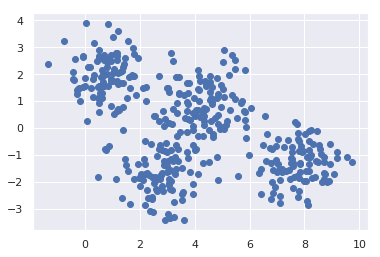

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()
import numpy as np 
from sklearn.datasets.samples_generator import make_blobs

X,y_true = make_blobs(n_samples = 400, 
                      centers = 4, 
                      cluster_std=0.8, 
                      random_state=0)
X = X[:, ::-1]
print(y_true)
plt.scatter(X[:,0],X[:,1])

# K-Means
- ambil sembarang posisi k centroid 
- ambil jarak euclidean minimum dari $$ \arg \min_{c_i \in C} dist(c_{i},x)^2$$  
- ambil centroid baru dengan menghitung rata-rata dari seluruh point yang assign ke dalam cluster lama $$ c_{i} = \frac{1}{S_{i}} \sum_{x_{i} \in s_{i}} $$   
- repeat until it converges

## checking convergency
![](https://i.imgur.com/k3o6NxK.jpg)


**pisahkan label sebagai y, X sebagai training data**

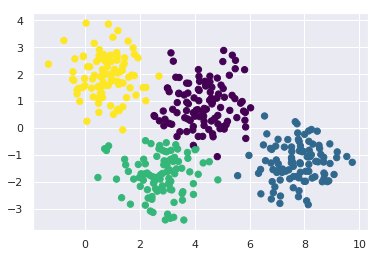

In [2]:
from sklearn.cluster import KMeans
kmeans = KMeans(init='random',n_clusters=4, random_state=0)
labels = kmeans.fit(X).predict(X)
# print(labels)
from pprint import pprint 
# pprint(X)
plt.scatter(X[:,0],X[:,1], c= labels, s=40, cmap='viridis')

**visualize**

In [3]:
#define kmeans visualization 
from scipy.spatial.distance import cdist
def plot_kmeans(kmeans, X, n_cluster=4, rseed=0, ax=None):
    labels=kmeans.fit_predict(X)
    print(labels)
    #plot input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(kmeans.cluster_centers_[:,0],
              kmeans.cluster_centers_[:,1],
              s=250,
              c='red',
              label='centroids')

    #plot representation of kmeans model 
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels==i],[center]).max()
            for i, center in enumerate(centers)]
    print([x for x in centers])
    ax.scatter(X[:,0],X[:,1],c=labels, s=40, cmap='viridis',zorder=2)
    
    for c,r in zip(centers,radii):
        ax.add_patch(plt.Circle(c,r,fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))
    plt.scatter(centers[:,0],centers[:,1], c='black',s=200)


[1 2 2 1 2 0 3 1 2 3 0 3 1 2 2 3 2 3 1 2 2 2 0 1 1 0 0 1 1 3 1 1 2 1 2 0 3
 1 3 1 2 0 3 1 3 0 3 3 3 0 0 0 2 0 0 2 1 3 3 2 3 3 3 3 1 2 3 1 1 0 2 1 2 0
 3 2 1 2 0 2 2 1 3 0 1 2 2 1 2 3 2 3 1 2 2 0 1 3 3 3 0 3 1 1 2 0 1 0 3 2 2
 2 1 2 0 3 0 2 0 0 1 1 3 0 1 0 3 3 3 1 0 0 0 2 1 2 0 1 0 2 1 2 2 0 2 3 1 2
 3 2 3 1 3 1 0 2 3 2 2 2 1 2 0 2 2 0 3 3 2 0 0 0 0 3 3 3 1 2 1 0 1 0 2 1 0
 2 0 1 1 0 1 1 0 2 0 0 0 3 3 1 1 2 3 3 0 1 2 0 1 0 1 1 3 3 0 3 1 0 3 0 2 1
 0 2 1 2 3 0 1 0 1 2 1 1 0 3 1 3 1 2 3 1 1 0 3 1 0 1 3 2 2 3 2 1 0 0 1 1 3
 0 1 2 2 2 0 1 1 1 1 1 3 1 1 0 2 3 0 3 3 3 0 3 3 0 0 0 3 1 3 1 3 2 1 3 2 1
 3 3 1 2 0 0 1 0 3 3 1 0 0 3 3 1 0 1 3 1 3 0 2 2 3 2 1 2 2 0 2 0 3 2 0 3 0
 1 2 1 2 3 1 3 0 3 3 3 3 0 3 2 3 2 3 1 0 1 3 3 1 2 2 0 0 0 2 1 3 1 2 3 2 0
 2 1 1 2 0 1 0 0 2 0 2 0 1 1 1 1 0 0 0 0 2 0 1 3 3 1 1 3 1 3]
[array([ 7.74669685, -1.29633231]), array([4.33172792, 0.86716617]), array([ 2.77426915, -1.7572152 ]), array([0.8025877 , 1.93882759])]


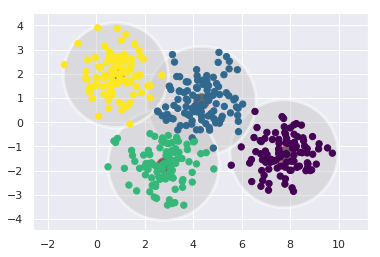

In [4]:
kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans,X)
#kmeans always circular, or oblong.

[0 1 3 2 1 0 1 2 3 3 0 1 2 3 3 3 1 1 2 3 3 3 0 2 2 0 0 3 2 3 3 2 3 2 2 0 1
 2 1 2 3 0 1 2 1 0 1 1 1 0 0 0 1 0 0 1 2 1 1 1 1 1 1 3 2 3 1 2 3 0 3 2 3 0
 3 3 3 3 2 3 3 2 1 0 2 3 3 2 3 1 1 1 2 3 2 0 2 1 1 3 0 1 2 2 3 0 2 0 3 3 3
 1 2 3 0 1 0 3 0 0 3 3 1 0 2 0 3 1 1 2 0 0 0 1 2 2 0 2 0 3 3 1 1 0 1 3 2 1
 1 1 3 2 1 2 0 3 1 3 3 1 2 1 0 3 3 0 1 1 3 0 0 0 0 1 1 3 2 3 2 0 2 0 1 2 0
 3 0 3 0 0 2 2 0 3 0 0 0 1 1 2 2 3 1 1 0 3 3 0 2 0 2 2 1 1 0 1 2 0 3 0 3 2
 0 1 3 3 1 0 2 0 2 3 0 2 0 1 2 1 2 3 1 2 2 0 3 2 0 2 1 3 1 1 3 2 0 2 2 2 1
 0 2 3 3 3 2 2 2 2 2 2 1 0 2 0 1 1 0 1 3 3 0 1 1 0 0 0 3 2 1 2 1 3 2 3 3 2
 1 3 3 1 0 0 2 0 3 1 2 0 0 3 1 2 0 2 1 0 1 2 3 3 3 1 2 1 3 0 3 0 3 3 0 3 0
 2 2 2 2 3 3 1 0 1 1 1 1 0 1 3 3 1 1 3 0 3 1 3 2 3 3 0 0 0 3 2 1 2 3 3 1 0
 3 3 2 3 2 2 0 0 1 0 3 0 2 2 2 2 0 0 2 0 1 0 2 1 3 2 2 1 3 1]
[array([-5.45896792,  5.33459908]), array([-0.63593556,  0.99740741]), array([-3.29582495,  3.73052051]), array([-1.88612063,  1.85937859])]


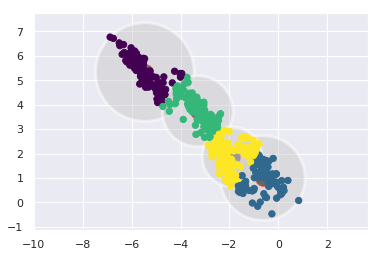

In [5]:
rng = np.random.RandomState(13)
X_stretched = np.dot(X,rng.randn(2,2))
kmeans = KMeans(n_clusters = 4, random_state = 0)
plot_kmeans(kmeans, X_stretched)
#non circular set, transformed to circular 

# Gaussian Mixture Model 
## gmm merupakan *probstat*
mirip dengan k-means, dengan menggunakan pendekatan expectation-maximization
1. ambil random untuk lokasi centroid dan bentuk 
2. repeat sampai konvergen 
    - *e-step*: tiap point, temukan "encoding weight" dengan kemungkinan titik di tiap cluster
    - *m-step*: tiap centroid, update lokasi, normalisasi dan bentuk dari seluruh data point, untuk membuat weight

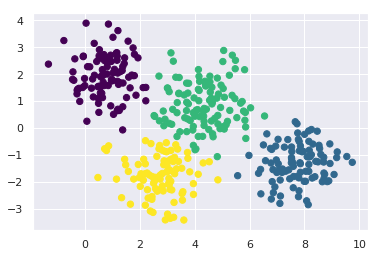

In [6]:
from sklearn.mixture import GaussianMixture 
gmm = GaussianMixture(n_components=4).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:,0],X[:,1],c=labels,s=40,cmap='viridis')

*gmm contains probablistic models* jadi bisa menunjukkan probabilistic cluster dengan menggunakan `predict_proba` yang return matrix `[n_samples, n_clusters]`

In [7]:
probs = gmm.predict_proba(X)
print(probs.round(3))

[[0.    0.004 0.996 0.   ]
 [0.    0.    0.    1.   ]
 [0.    0.    0.    1.   ]
 ...
 [1.    0.    0.    0.   ]
 [0.013 0.    0.951 0.036]
 [1.    0.    0.    0.   ]]


array([49.55244928, 49.99727484, 49.99595619, 49.84072202, 49.99609659,
       49.99971496, 49.99172866, 41.15856305, 49.62075364, 49.65352099,
       49.99455084, 49.99988138, 43.50984576, 49.93044535, 27.49520071,
       49.99169306, 49.97952125, 49.99666362, 49.9532884 , 34.53646104,
       24.21528565, 49.95237619, 49.99352538, 49.99432216, 49.98122477,
       49.99426033, 49.09744522, 40.07084838, 49.99960703, 49.99880552,
       47.53089417, 49.80598344, 49.8511767 , 49.6263621 , 17.27395764,
       49.99901013, 49.96846997, 49.998594  , 49.80255147, 49.55120329,
       49.63947081, 49.83436025, 49.99408559, 30.42913588, 49.9995943 ,
       49.99771202, 49.9998645 , 49.98911655, 49.99933767, 49.99039495,
       49.99975611, 49.91855609, 49.81796924, 49.9958286 , 49.98285353,
       49.99801263, 44.24633263, 49.99447125, 12.09731222, 39.77906662,
       49.8823629 , 49.99909659, 49.99236425, 33.81939523, 49.95587759,
       49.94213363, 49.99349242, 26.43912685, 28.7488429 , 31.58

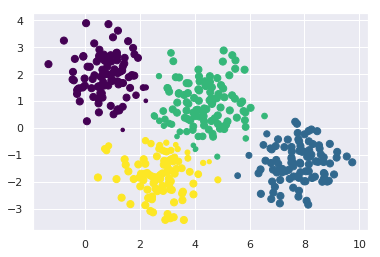

In [8]:
size = 50 * probs.max(1)**2 #dikuadratkan biar perbedaanya terlihat
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=size)
size

In [9]:
#visualisasi 
from matplotlib.patches import Ellipse
def draw_ellipse(position, covariance, ax=None, **kwargs): 
    ax = plt.gca()
    
    #convert konvarians ke axis
    if covariance.shape == (2,2):
        U, s, Vt= np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1,0],U[0,0]))
        width, height = 2*np.sqrt(s)
    else: 
        angle=0
        width,height=2*np.sqrt(covariance)
    for nsig in range(1,4):
        ax.add_patch(Ellipse(position, nsig*width, nsig*height, angle, **kwargs))

In [10]:
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels=gmm.fit(X).predict(X)
    if label: 
        ax.scatter(X[:, 0],X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else: 
        ax.scatater(X[:,0],X[:, 1], s=40, cmap='viridis', zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for position, covariance, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(position, covariance, alpha=w*w_factor)

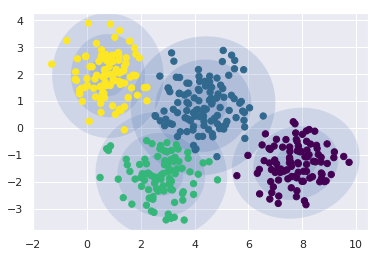

In [11]:
gmm = GaussianMixture(n_components = 4, covariance_type='full', random_state=0)
plot_gmm(gmm,X)

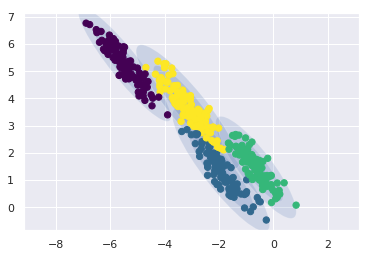

In [12]:
gmm2 = GaussianMixture(n_components = 4, random_state=0)
plot_gmm(gmm2,X_stretched)

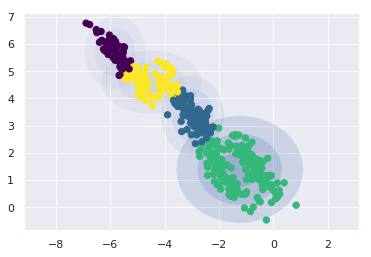

In [13]:
gmm = GaussianMixture(n_components = 4, covariance_type='diag', random_state=0)
plot_gmm(gmm,X_stretched)

## check optimal components
akaike information criterion, bayesian information criterion

In [14]:
n_components = np.arange(1,21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X)
         for n in n_components]

Text(0.5, 0, 'n_components')

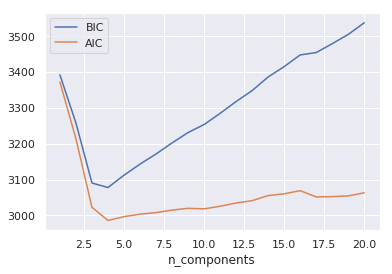

In [15]:
plt.plot(n_components, [m.bic(X) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')

berarti
AIC = 3-5
BIC = 3-5

# Bayesian Network Classification 

$$ P(L|features) = \frac{P(features|L_{i})P(L_{i})}{P(features)} $$ 

(-1.8850500381203659, 10.304695789534376, -3.806508053398256, 4.2823353955751)

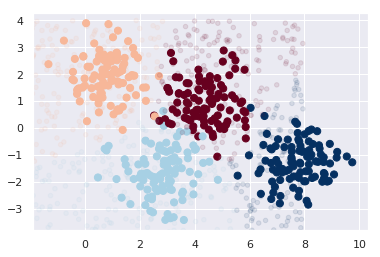

In [16]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X,y_true)
rng = np.random.RandomState(0)
Xnew = [-6,-14] + [14,18] * rng.rand(2000,2)
ynew = model.predict(Xnew)
plt.scatter(X[:, 0], X[:, 1], c=y_true, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim)

In [17]:
yprob = model.predict_proba(Xnew)
yprob[:-8].round(2)

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]])

# SVM 
separation of classes, membagi menggunakan garis jika linear, menggunakan hyper-plane jika multidimensional   
![](https://docs.opencv.org/2.4/_images/optimal-hyperplane.png)    
**objektif**: optimizing margin, dimana margin didefinisikan sebagai separating hyperplane

$$ W_{0} + w^T x_{pos} = 1  ... (1) $$
$$ W_{0} + w^T x_{neg} = -1 ... (2) $$

Dari sini didapat hasil dari (1) dan (2)

$$ \Rightarrow w^T(X_{pos} - X_{neg}) = 2 $$



In [18]:
y = labels
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.4)

In [19]:
X_train
from sklearn.svm import SVC, LinearSVC
c=20
models = (SVC(kernel='linear', C=c),
          LinearSVC(C=c),
          SVC(kernel='rbf',gamma=0.9, C=c),
          SVC(kernel='poly', degree=6,C=c)
         )
#merubah gamma biar lebih fit, cut off parameter untuk hyperplane (effects decision boundary)
models = (classifier.fit(X_train, Y_train) for classifier in models)
judul = ('SVC with linear kernel',
        'Linear SVC with linear kernel',
        'SVC with rbf kernel',
        'SVC with polynomial 3rd degree kernel')

svc = SVC(kernel='rbf',C=1, gamma=1)
svc.fit(X_train, Y_train)
y_pred = svc.predict(X_test)
from sklearn.metrics import accuracy_score 
accuracy_score(Y_test,y_pred)

0.98125

/home/svmihar/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/svmihar/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


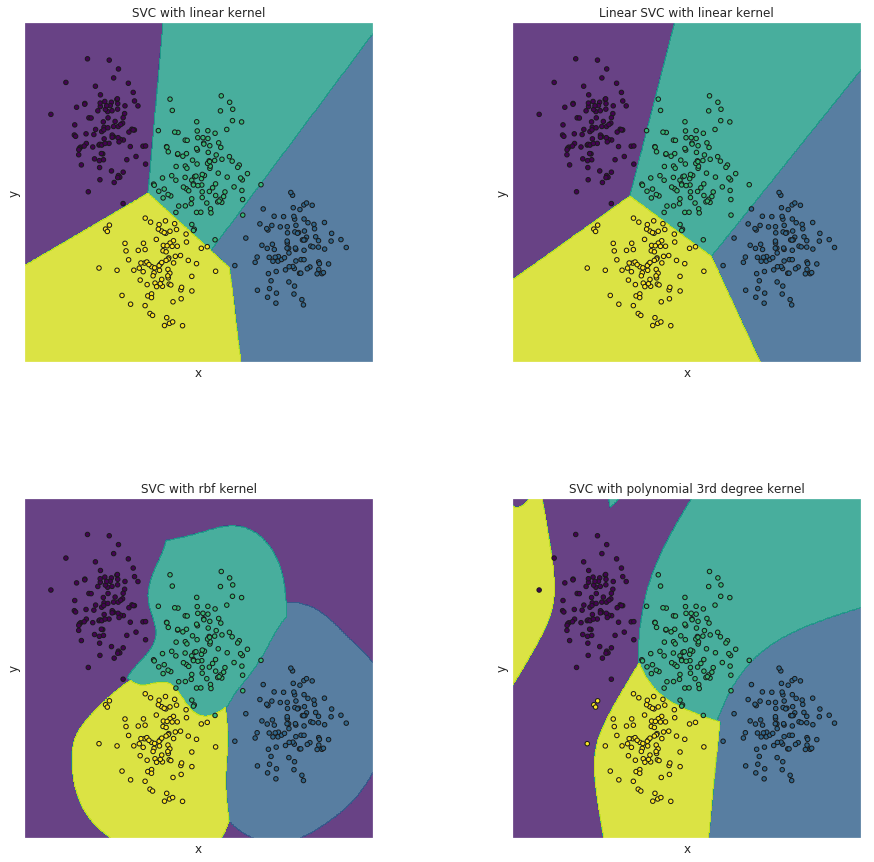

In [20]:

def make_meshgrid(x,y,h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy
def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out
fig, sub = plt.subplots(2,2,figsize=(15,15))
plt.subplots_adjust(wspace=.4, hspace=.4)

X0, X1 = X[:,0],X[:,1]
xx,yy = make_meshgrid(X0,X1)
for classifier, title, ax in zip(models, judul, sub.flatten()):
    plot_contours(ax,classifier,xx,yy,cmap='viridis',alpha=0.8)
    ax.scatter(X0,X1,c=y, cmap='viridis',s=20,edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

# Hierarchical Clustering

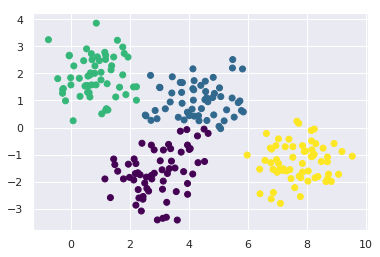

In [30]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  

cluster.fit_predict(X_train)
plt.scatter(X_train[:,0],X_train[:,1], c=cluster.labels_, cmap='viridis')  